# LABORATORIO DE INTELIGENCIA ARTIFICIAL - PROVA 2
## DUPLA: Cristhian Sala Minoves e Wiliian Silva de Almeida

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from perceptrom import* 


### Lendo os dados e embaralhando para treino, separando as amostras

In [2]:
rotulos=(('1',[0,0,1]),('2',[0,1,0]),('3',[1,0,0]))
Entradas,w,b=ler_dados('seeds_dataset.txt',3,rotulos)
# também inicio w e b com valores aleatorios proximos de 0
Entradas

[(array([15.26 , 14.84 ,  0.871,  5.763,  3.312,  2.221,  5.22 ]), [0, 0, 1]),
 (array([14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ]),
  [0, 0, 1]),
 (array([14.29 , 14.09 ,  0.905,  5.291,  3.337,  2.699,  4.825]), [0, 0, 1]),
 (array([13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ]),
  [0, 0, 1]),
 (array([16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ]),
  [0, 0, 1]),
 (array([14.38  , 14.21  ,  0.8951,  5.386 ,  3.312 ,  2.462 ,  4.956 ]),
  [0, 0, 1]),
 (array([14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ]),
  [0, 0, 1]),
 (array([14.11  , 14.1   ,  0.8911,  5.42  ,  3.302 ,  2.7   ,  5.    ]),
  [0, 0, 1]),
 (array([16.63  , 15.46  ,  0.8747,  6.053 ,  3.465 ,  2.04  ,  5.877 ]),
  [0, 0, 1]),
 (array([16.44 , 15.25 ,  0.888,  5.884,  3.505,  1.969,  5.533]), [0, 0, 1]),
 (array([15.26  , 14.85  ,  0.8696,  5.714 ,  3.242 ,  4.543 ,  5.314 ]),
  [0, 0, 1]),
 (array([14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.71

In [3]:
#Embaralhar entrada
Entradas_treino,Entradas_teste=separar_amostra(Entradas,2,3,rotulos)
print(len(Entradas_teste),len(Entradas_treino))

69 141


In [4]:
ErroD={}
ErroS={}
div=50 # calculo do passo de alpha
inicial=.02 # inicia em 2% de aprendizagem variando de 2% em 2% até 20%
#Para gerar os graficos na proxima celula
ngraf=10
Inter=30 # numero de interações para cada treino

### Realizando o treino 
Guardando seus erros, pesos e bias... tanto do degrau quanto sigmoidal

In [5]:

for i in range(ngraf): 
    WD,BD,ErroDx=preceptron_treino(Entradas_treino,w.copy(),b.copy(),alfa=(i/div+inicial),max_int=Inter)
    WS,BS,ErroSx=preceptron_treino(Entradas_treino,w.copy(),b.copy(),alfa=(i/div+inicial),max_int=Inter,modo='sigmo')
    ErroD[(i/div+inicial)]=(ErroDx,WD,BD) # dicionario de erros,pesos e bias do treino com degrau
    ErroS[(i/div+inicial)]=(ErroSx,WS,BS) # dicionario de erros,peso e bias do treino com sigmoid
    #as chaves são as taxa de aprendizagem


### Plotando os gráficos dos erros por interação de para cada alpha

função de ativação: degrau


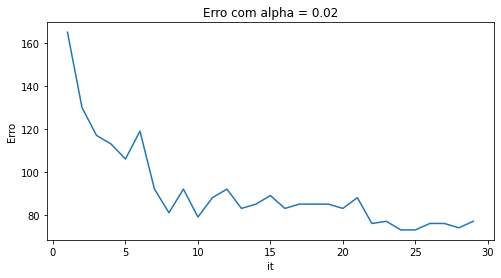

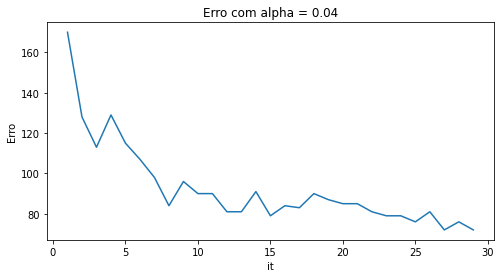

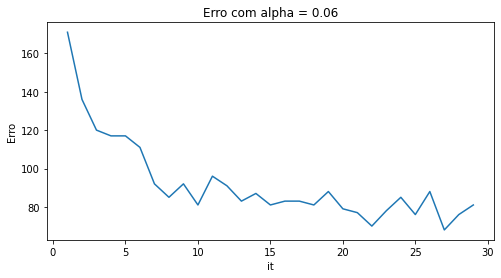

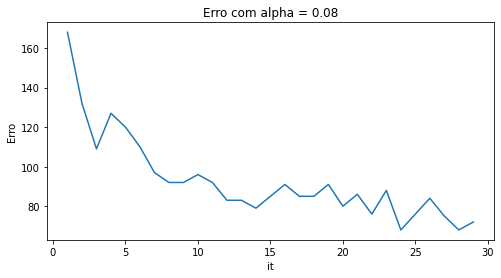

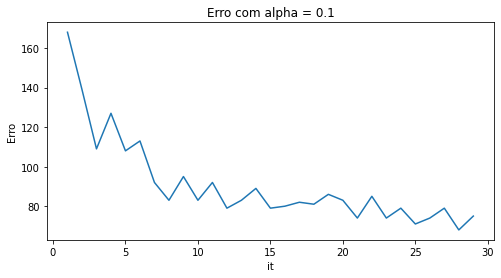

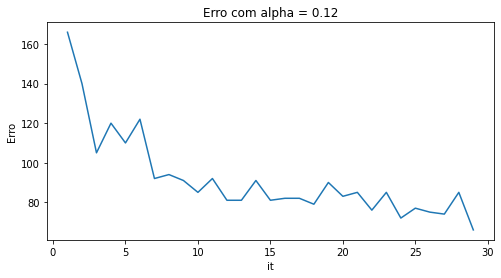

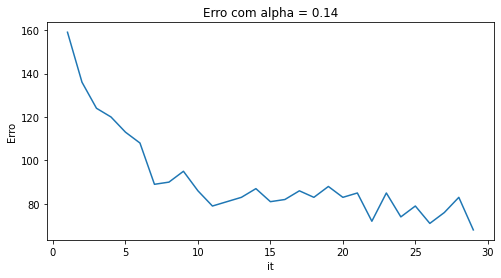

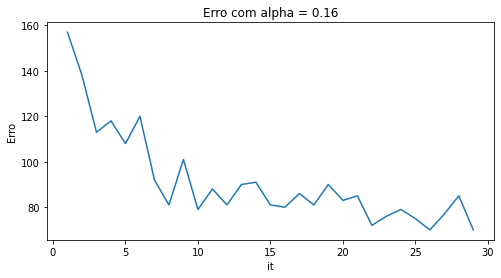

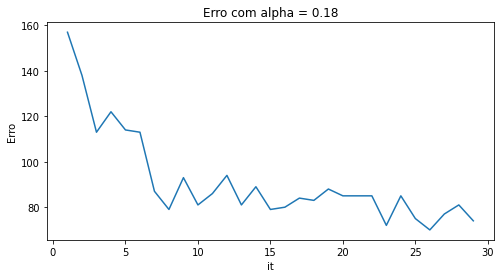

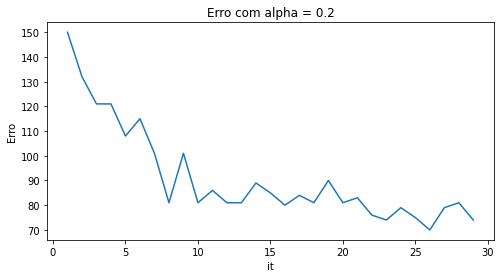

In [6]:

for aprendizagem in ErroD:
    #print(aprendizagem)
    fig,ax=plt.subplots(1,1)
    fig.set_figheight(4)
    fig.set_figwidth(8)
    plt.plot(np.array(list(ErroD[aprendizagem][0].keys())),np.array(list(ErroD[aprendizagem][0].values())))
    plt.xlabel('it')
    plt.ylabel('Erro')
    plt.title(f'Erro com alpha = {aprendizagem:.2}')

print( 'função de ativação: degrau')
plt.show()

### Plotando os gráficos com os erros da função Sigmoidal

função de ativação: sigmoid


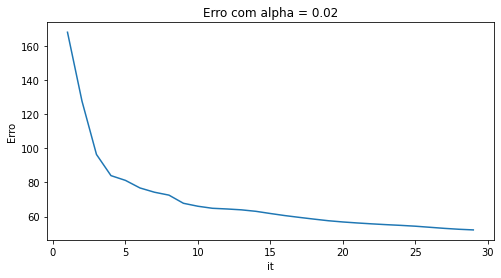

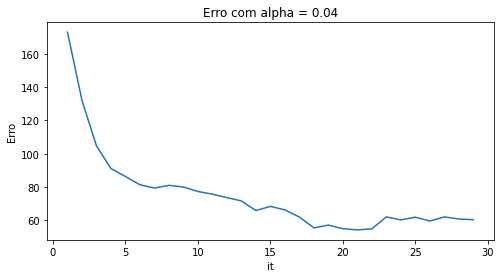

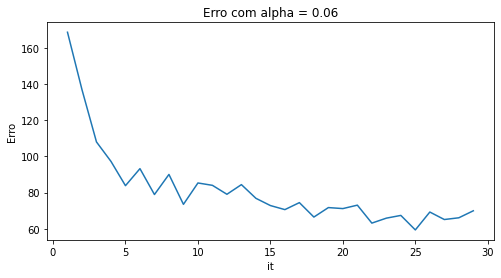

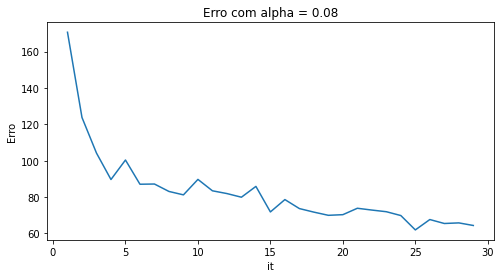

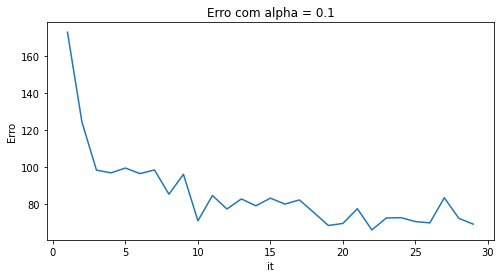

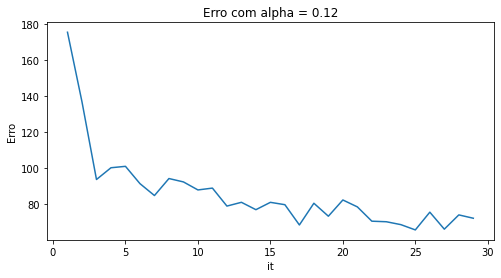

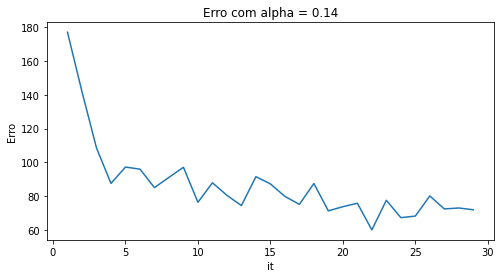

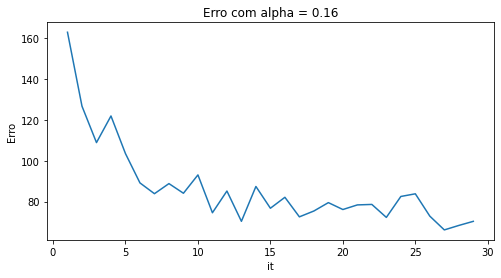

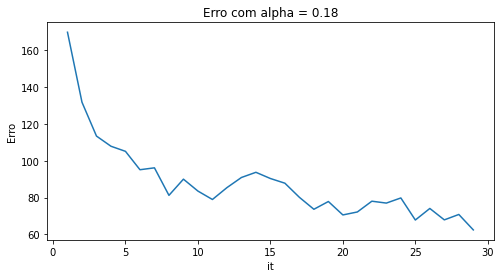

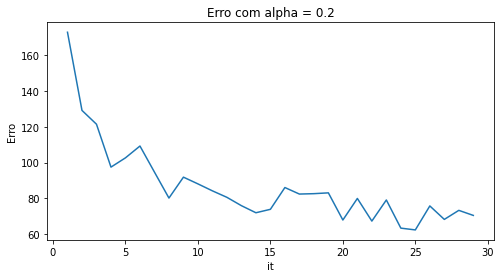

In [7]:
for aprendizagem in ErroS:
    #print(aprendizagem)
    fig,ax=plt.subplots(1,1)
    fig.set_figheight(4)
    fig.set_figwidth(8)
    plt.plot(np.array(list(ErroS[aprendizagem][0].keys())),np.array(list(ErroS[aprendizagem][0].values())))
    plt.xlabel('it')
    plt.ylabel('Erro')
    plt.title(f'Erro com alpha = {aprendizagem:.2}')

print( 'função de ativação: sigmoid')
plt.show()

In [8]:
AcuraciaD={}
AcuraciaS={}
for aprendizagem in ErroD:
    AcuraciaD[aprendizagem]= preceptron_teste(ErroD[aprendizagem][1],ErroD[aprendizagem][2],Entradas_teste)
for aprendizagem in ErroS:
    AcuraciaS[aprendizagem]= preceptron_teste(ErroS[aprendizagem][1],ErroS[aprendizagem][2],Entradas_teste,modo='sigmo')


[0. 0. 0.] degrau
[0. 0. 0.] degrau
[0. 0. 0.] degrau
[0. 0. 0.] degrau
[0. 0. 1.] degrau
[0. 0. 0.] degrau
[0. 0. 0.] degrau
[0. 0. 0.] degrau
[0. 0. 0.] degrau
[0. 0. 0.] degrau
[0. 0. 0.] degrau
[0. 0. 1.] degrau
[0. 0. 0.] degrau
[0. 1. 0.] degrau
[0. 0. 0.] degrau
[0. 0. 1.] degrau
[0. 0. 0.] degrau
[0. 0. 0.] degrau
[0. 0. 1.] degrau
[0. 0. 1.] degrau
[0. 0. 0.] degrau
[0. 0. 0.] degrau
[0. 0. 1.] degrau
[0. 1. 0.] degrau
[0. 0. 0.] degrau
[0. 0. 0.] degrau
[0. 0. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 0. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 1. 0.] degrau
[0. 0. 0.] degrau
[0. 1. 0.] degrau
[1. 0. 0.] degrau
[1. 0. 0.] degrau
[1. 0. 0.] degrau
[1. 0. 0.] degrau
[1. 0. 0.] degrau
[1. 0. 0.] degrau
[1. 0. 0.] degrau
[1. 0. 0.] degrau
[0. 0. 0.] degrau
[1. 0. 0.]

[0. 1. 0.] sigmo
[0. 0. 1.] sigmo
[0. 0. 1.] sigmo
[1. 0. 0.] sigmo
[0. 0. 1.] sigmo
[0. 0. 1.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 0. 1.] sigmo
[0. 0. 1.] sigmo
[1. 0. 0.] sigmo
[0. 0. 1.] sigmo
[0. 0. 1.] sigmo
[0. 0. 1.] sigmo
[0. 0. 1.] sigmo
[0. 0. 1.] sigmo
[0. 0. 1.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[0. 1. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[0. 0. 1.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sigmo
[1. 0. 0.] sig

In [15]:
print('\tDegrau\t\t\t\tSigmoide')
print('alpha:\tErro\tAcurácia\t\tErro\tAcurácia')
media=[[0,0],[0,0]]
for aprendizagem in ErroD:
    media[0][0]+=AcuraciaD[aprendizagem][0]
    media[0][1]+=AcuraciaD[aprendizagem][1]
    media[1][0]+=AcuraciaS[aprendizagem][0]
    media[1][1]+=AcuraciaS[aprendizagem][1]
    print(f'{aprendizagem:.2}\t{AcuraciaD[aprendizagem]}\t{AcuraciaS[aprendizagem]}')
print(f'media:\t{(media[0][0]/len(ErroD),media[0][1]/len(ErroD))}\t{(media[1][0]/len(ErroD),media[1][1]/len(ErroD))}')


	Degrau				Sigmoide
alpha:	Erro	Acurácia		Erro	Acurácia
0.02	(24.0, 0.6666666666666666)	(24.0, 0.8260869565217391)
0.04	(22.0, 0.7101449275362319)	(20.0, 0.855072463768116)
0.06	(37.0, 0.4782608695652174)	(22.0, 0.8405797101449275)
0.08	(34.0, 0.5072463768115942)	(14.0, 0.8985507246376812)
0.1	(31.0, 0.5797101449275363)	(22.0, 0.8405797101449275)
0.12	(30.0, 0.5797101449275363)	(40.0, 0.7101449275362319)
0.14	(29.0, 0.6086956521739131)	(18.0, 0.8695652173913043)
0.16	(26.0, 0.6376811594202898)	(34.0, 0.7536231884057971)
0.18	(25.0, 0.6666666666666666)	(18.0, 0.8695652173913043)
0.2	(24.0, 0.6811594202898551)	(22.0, 0.8405797101449275)
media:	(28.2, 0.6115942028985508)	(23.4, 0.8304347826086957)


Como as possibilidade de saída (y) do degrau ([0 0 0] [0 0 1] ... [1 1 1]) é diferente da sigmoide ([0 0 1] [0 1 0] [1 0 0]) na fase de testes, o somatório do quadrado dos erros não é um bom comparativo entre os neurônios de com funções de ativações diferentes. Apenas serve para a comparação entre redes com mesma ativação, mas de alpha diferente. 

Já a acurácia compara bem duas redes quaisquer, já que é calculado pelo número de classificações corretas sobre o numero de classificações totais.
